In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

## Support Functions
---

*Plot Functions*
- plot_all_sensors
- gravity_plot
- acceleration_plot
- linear_acceleration_plot
- gyroscope_plot

In [20]:
def gravity_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['gravity_time'], dataframe['gravity_x'], label='X (m/s^2)')
    plt.plot(dataframe['gravity_time'], dataframe['gravity_y'], label='Y (m/s^2)')
    plt.plot(dataframe['gravity_time'], dataframe['gravity_z'], label='Z (m/s^2)')
    plt.xlabel('Time (s)')
    plt.ylabel('Gravity (m/s^2)')
    plt.title('Gravity Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def acceleration_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['acc_time'], dataframe['acc_x'], label='X (m/s^2)')
    plt.plot(dataframe['acc_time'], dataframe['acc_y'], label='Y (m/s^2)')
    plt.plot(dataframe['acc_time'], dataframe['acc_z'], label='Z (m/s^2)')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.title('Acceleration Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def linear_acceleration_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['lin_acc_time'], dataframe['lin_acc_x'], label='X (m/s^2)')
    plt.plot(dataframe['lin_acc_time'], dataframe['lin_acc_y'], label='Y (m/s^2)')
    plt.plot(dataframe['lin_acc_time'], dataframe['lin_acc_z'], label='Z (m/s^2)')
    plt.xlabel('Time (s)')
    plt.ylabel('Linear Acceleration (m/s^2)')
    plt.title('Linear Acceleration Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def gyroscope_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['gyro_time'], dataframe['gyro_x'], label='X (rad/s)')
    plt.plot(dataframe['gyro_time'], dataframe['gyro_y'], label='Y (rad/s)')
    plt.plot(dataframe['gyro_time'], dataframe['gyro_z'], label='Z (rad/s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Gyroscope (rad/s)')
    plt.title('Gyroscope Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_all_sensors(dataframe):
    gravity_plot(dataframe)
    acceleration_plot(dataframe)
    linear_acceleration_plot(dataframe)
    gyroscope_plot(dataframe)

*Data Cleaning*
- clean_data_statistics

In [21]:
def clean_statistics(df):
    stats = df.describe().drop(columns=['gravity_time', 'acc_time', 'lin_acc_time', 'gyro_time'])
    stats.index = [re.sub(r'^(.*)$', r'\1', idx) for idx in stats.index]
    return stats

# Retrieving Static Positions Sensors Data

In [22]:
base_experiment = pd.read_csv(r'data\base\sensor_data_20251001_144049.csv')


In [23]:
base_experiment

,timestamp,gravity_x,gravity_y,gravity_z,gravity_time,lin_acc_x,lin_acc_y,lin_acc_z,lin_acc_time,acc_x,acc_y,acc_z,acc_time,gyro_x,gyro_y,gyro_z,gyro_time
0,2025-10-01 14:38:35.880721,0.393640,-0.009031,-9.802097,1346.026696,0.831263,-0.976221,0.434127,1346.026696,0.660876,-1.130449,-7.321575,1346.031662,-0.046237,-0.304875,0.018456,1346.026696
1,2025-10-01 14:38:36.012325,0.341326,0.009744,-9.804054,1346.155834,2.232123,0.493210,0.218589,1346.155834,0.864452,0.796943,-7.243138,1346.160801,0.064229,0.049882,0.014542,1346.155834
2,2025-10-01 14:38:36.139472,0.319710,-0.004317,-9.804790,1346.284972,-0.042486,3.133410,-0.084398,1346.284972,0.366588,3.306324,-11.954890,1346.289939,0.016285,-0.077140,-0.069072,1346.284972
3,2025-10-01 14:38:36.270405,0.357505,-0.025468,-9.803449,1346.414111,0.989693,2.711333,0.830660,1346.414111,-0.074545,2.673740,-10.817106,1346.419077,-0.016472,-0.081536,0.018670,1346.414111
4,2025-10-01 14:38:36.406991,0.349244,-0.031915,-9.803729,1346.553183,0.072878,0.845773,-0.126620,1346.553183,0.422122,0.813858,-9.930350,1346.548216,0.005375,0.004809,0.000707,1346.553183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-10-01 14:40:48.753780,0.412868,-0.009101,-9.801306,1478.900189,0.004464,0.004011,0.003878,1478.900189,0.417332,-0.005089,-9.797426,1478.895223,-0.001065,0.001261,0.001318,1478.900189
996,2025-10-01 14:40:48.889143,0.412455,-0.009345,-9.801323,1479.029327,-0.000212,0.002459,0.010631,1479.029327,0.411045,-0.014220,-9.800420,1479.034294,-0.000642,0.001551,0.000702,1479.029327
997,2025-10-01 14:40:49.021558,0.412049,-0.008954,-9.801336,1479.168399,0.001241,0.003415,-0.004620,1479.168399,0.409099,-0.011676,-9.803114,1479.173366,-0.001407,-0.002512,0.000692,1479.168399
998,2025-10-01 14:40:49.160594,0.411641,-0.008725,-9.801357,1479.297537,0.000602,0.004384,-0.013433,1479.297537,0.412243,-0.004341,-9.814790,1479.292570,0.000810,-0.001229,0.000832,1479.297537


In [24]:
base_experiment['time_only'] = pd.to_datetime(base_experiment['timestamp']).dt.time

In [25]:
base_experiment

,timestamp,gravity_x,gravity_y,gravity_z,gravity_time,lin_acc_x,lin_acc_y,lin_acc_z,lin_acc_time,acc_x,acc_y,acc_z,acc_time,gyro_x,gyro_y,gyro_z,gyro_time,time_only
0,2025-10-01 14:38:35.880721,0.393640,-0.009031,-9.802097,1346.026696,0.831263,-0.976221,0.434127,1346.026696,0.660876,-1.130449,-7.321575,1346.031662,-0.046237,-0.304875,0.018456,1346.026696,14:38:35.880721
1,2025-10-01 14:38:36.012325,0.341326,0.009744,-9.804054,1346.155834,2.232123,0.493210,0.218589,1346.155834,0.864452,0.796943,-7.243138,1346.160801,0.064229,0.049882,0.014542,1346.155834,14:38:36.012325
2,2025-10-01 14:38:36.139472,0.319710,-0.004317,-9.804790,1346.284972,-0.042486,3.133410,-0.084398,1346.284972,0.366588,3.306324,-11.954890,1346.289939,0.016285,-0.077140,-0.069072,1346.284972,14:38:36.139472
3,2025-10-01 14:38:36.270405,0.357505,-0.025468,-9.803449,1346.414111,0.989693,2.711333,0.830660,1346.414111,-0.074545,2.673740,-10.817106,1346.419077,-0.016472,-0.081536,0.018670,1346.414111,14:38:36.270405
4,2025-10-01 14:38:36.406991,0.349244,-0.031915,-9.803729,1346.553183,0.072878,0.845773,-0.126620,1346.553183,0.422122,0.813858,-9.930350,1346.548216,0.005375,0.004809,0.000707,1346.553183,14:38:36.406991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-10-01 14:40:48.753780,0.412868,-0.009101,-9.801306,1478.900189,0.004464,0.004011,0.003878,1478.900189,0.417332,-0.005089,-9.797426,1478.895223,-0.001065,0.001261,0.001318,1478.900189,14:40:48.753780
996,2025-10-01 14:40:48.889143,0.412455,-0.009345,-9.801323,1479.029327,-0.000212,0.002459,0.010631,1479.029327,0.411045,-0.014220,-9.800420,1479.034294,-0.000642,0.001551,0.000702,1479.029327,14:40:48.889143
997,2025-10-01 14:40:49.021558,0.412049,-0.008954,-9.801336,1479.168399,0.001241,0.003415,-0.004620,1479.168399,0.409099,-0.011676,-9.803114,1479.173366,-0.001407,-0.002512,0.000692,1479.168399,14:40:49.021558
998,2025-10-01 14:40:49.160594,0.411641,-0.008725,-9.801357,1479.297537,0.000602,0.004384,-0.013433,1479.297537,0.412243,-0.004341,-9.814790,1479.292570,0.000810,-0.001229,0.000832,1479.297537,14:40:49.160594


## Static Regular Position Data
This plot shows the sensors data when the skateboard is in a static position with the wheels pointing downward. The data represents the baseline sensor readings in this standard orientation.

In [26]:
static_regular = base_experiment[base_experiment['time_only'] > datetime.strptime('14:40:32', '%H:%M:%S').time()]

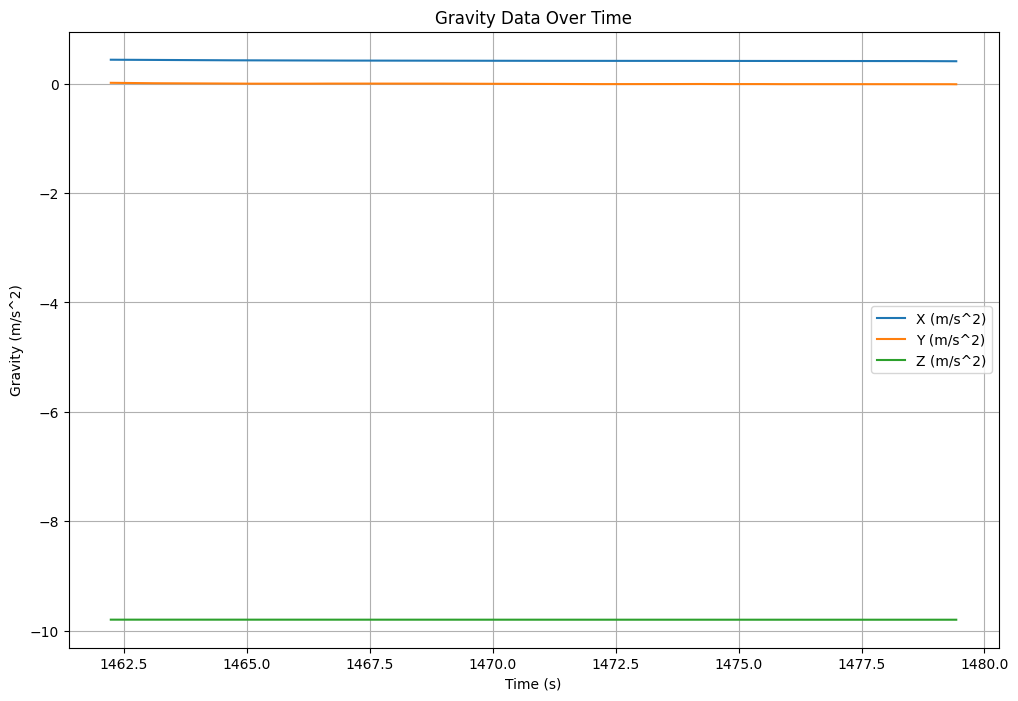

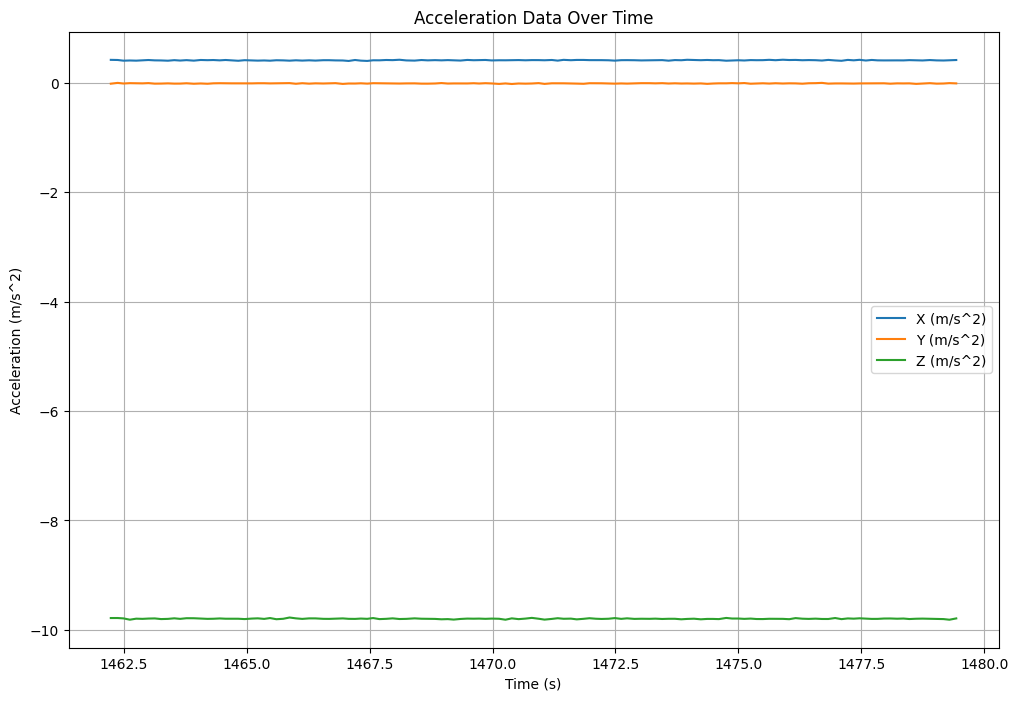

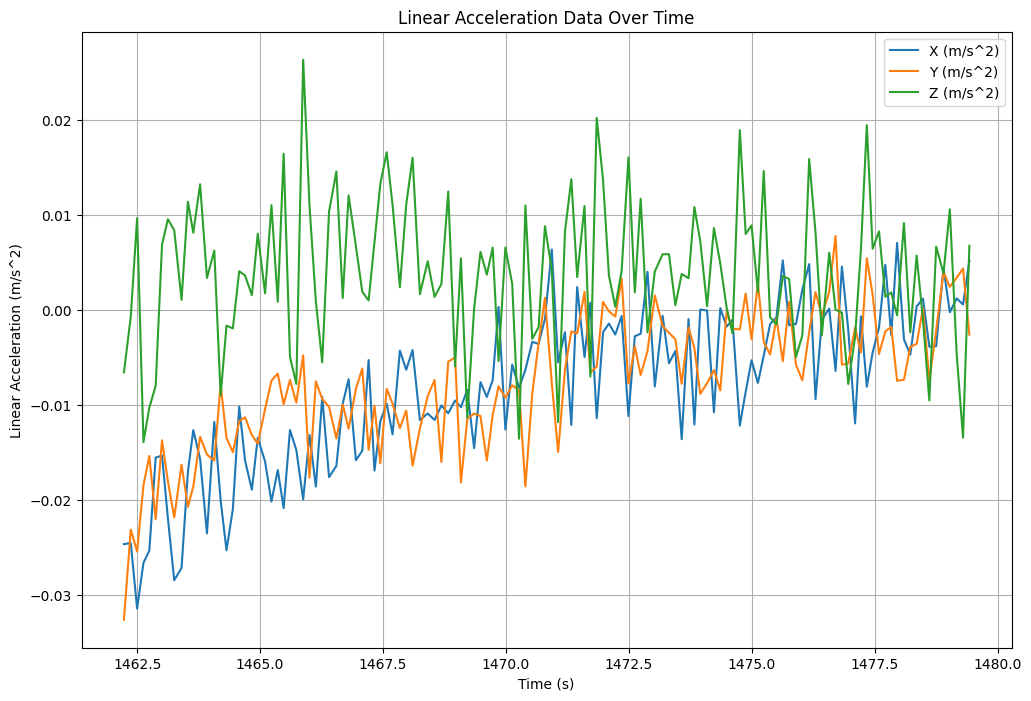

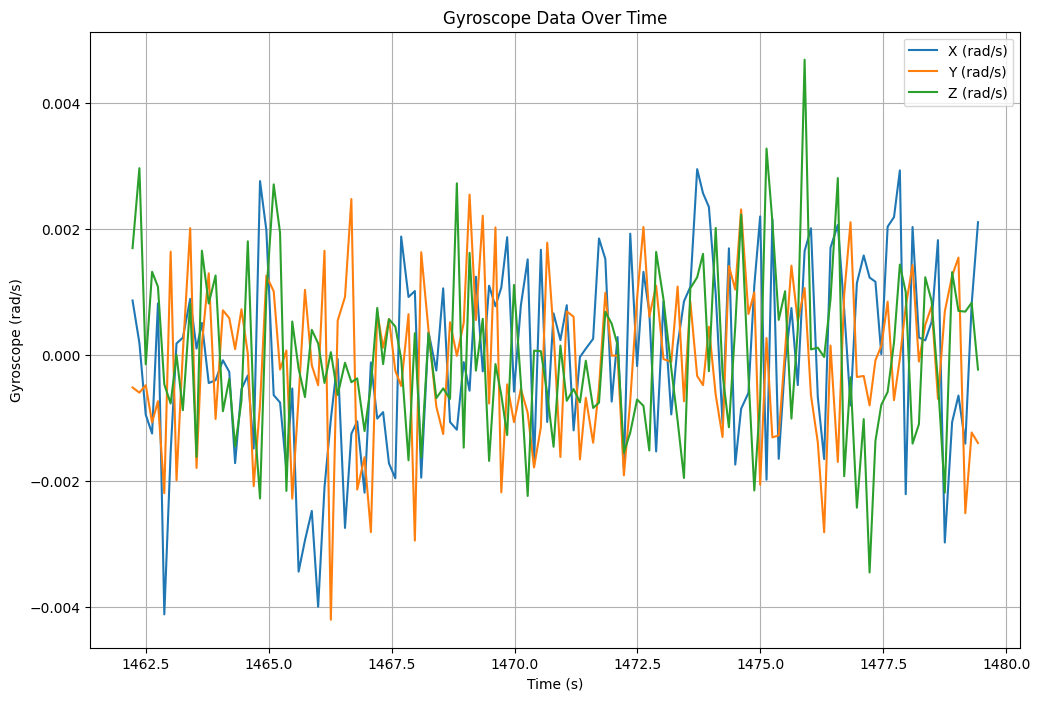

In [27]:
plot_all_sensors(static_regular)

In [28]:
static_regular_statistics = clean_statistics(static_regular)
display(static_regular_statistics)

,gravity_x,gravity_y,gravity_z,lin_acc_x,lin_acc_y,lin_acc_z,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.421263,-0.001860,-9.800947,-0.008275,-0.007545,0.003944,0.413351,-0.009947,-9.796636,0.000005,-0.000097,-0.000022
std,0.006264,0.005994,0.000271,0.008371,0.006985,0.007563,0.004657,0.003916,0.006821,0.001501,0.001279,0.001306
min,0.411364,-0.009705,-9.801369,-0.031418,-0.032594,-0.013894,0.400717,-0.020657,-9.814790,-0.004119,-0.004204,-0.003453
25%,0.416598,-0.006844,-9.801149,-0.013222,-0.011502,-0.000576,0.410409,-0.012162,-9.799971,-0.001055,-0.000804,-0.000794
50%,0.419042,-0.003416,-9.801044,-0.007621,-0.007379,0.003776,0.413590,-0.009805,-9.797202,0.000060,-0.000010,-0.000180
75%,0.424613,0.002266,-9.800808,-0.001557,-0.002366,0.008702,0.416471,-0.007185,-9.793085,0.001089,0.000769,0.000815
max,0.439117,0.016876,-9.800156,0.007083,0.007828,0.026377,0.423320,0.000150,-9.774374,0.002955,0.002550,0.004694


## Static Dark Sensors Data
This plot illustrates the sensor data when the skateboard is in a static position with the wheels pointing upward. This orientation is crucial for understanding the sensor's behavior when the skateboard is flipped upside down.

In [29]:
static_dark = base_experiment[(base_experiment['time_only'] > datetime.strptime('14:40:13', '%H:%M:%S').time()) & (base_experiment['time_only'] < datetime.strptime('14:40:28', '%H:%M:%S').time())]

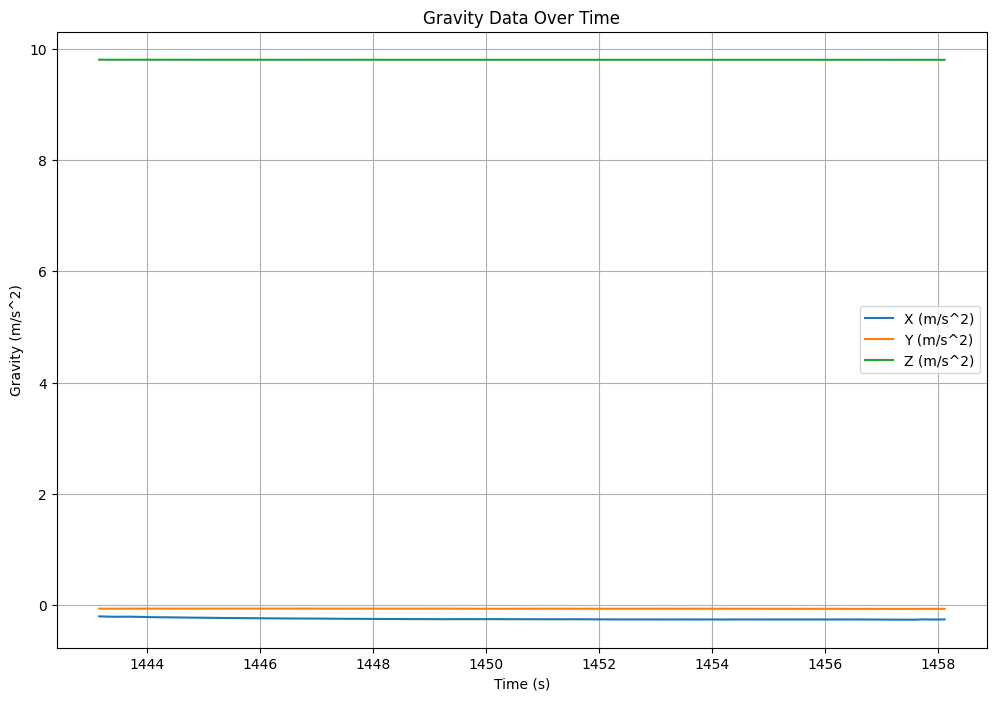

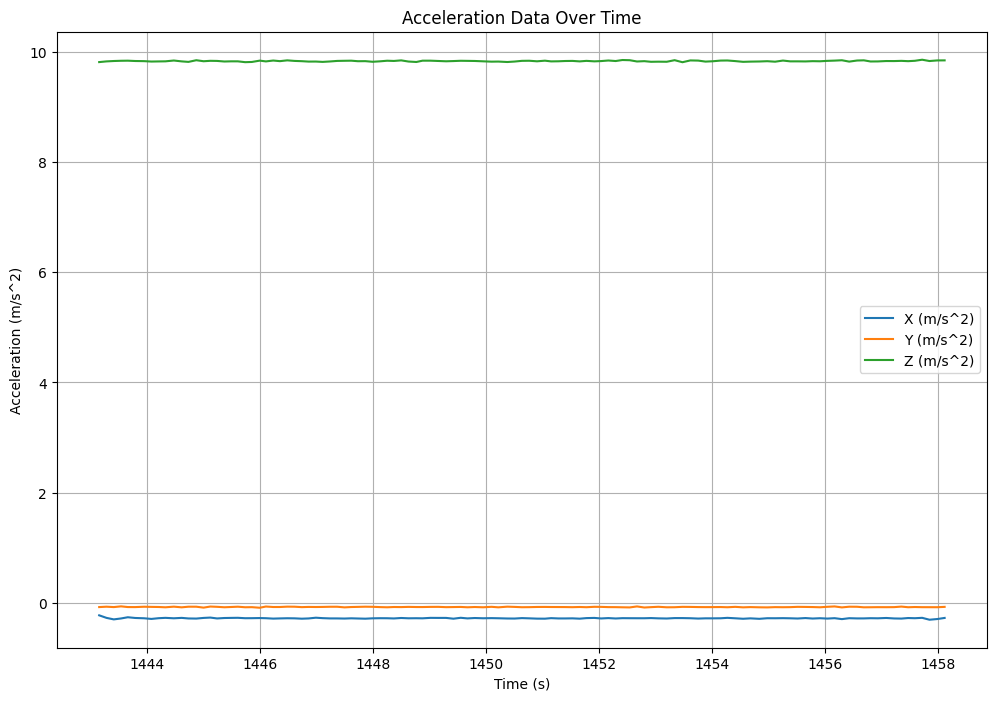

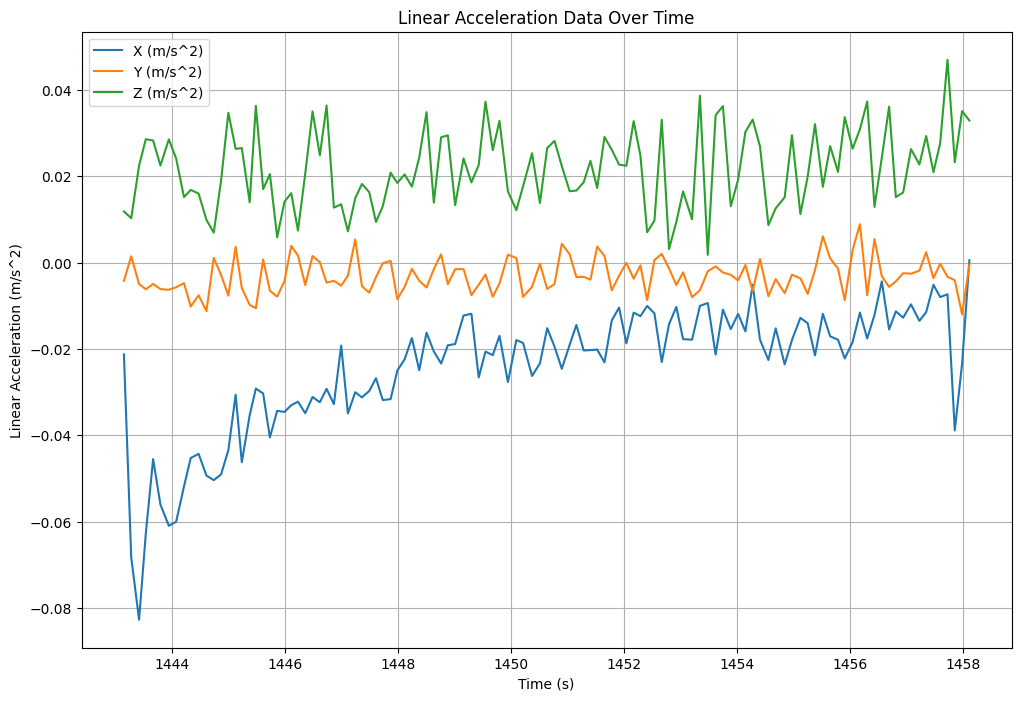

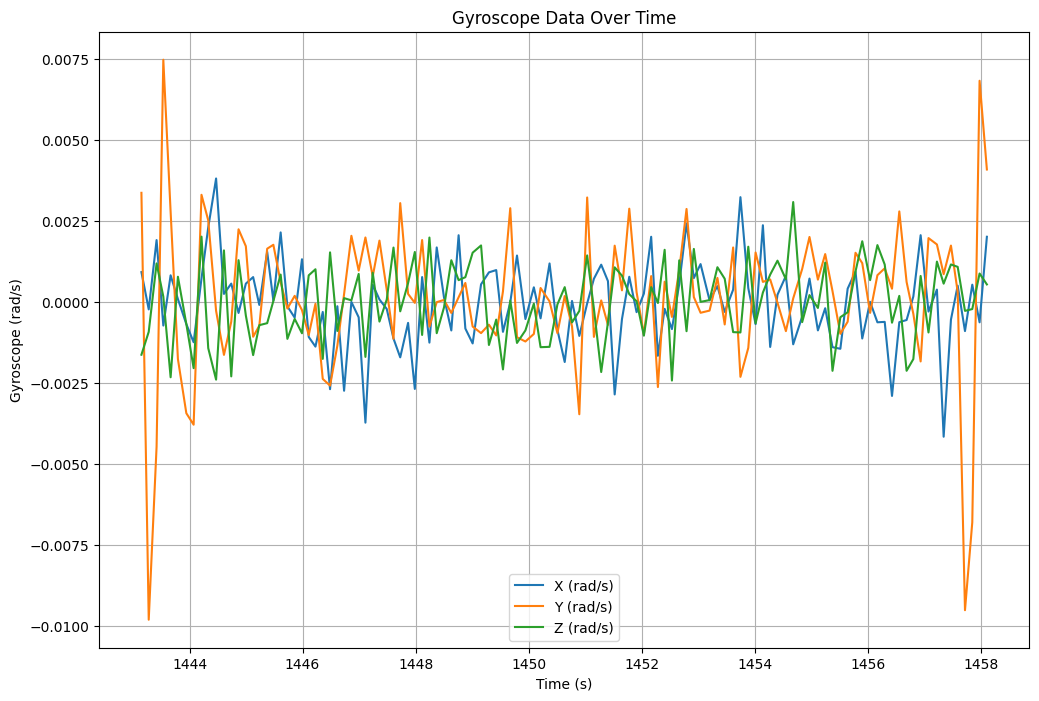

In [30]:
plot_all_sensors(static_dark)

In [31]:
static_dark_statistics = clean_statistics(static_dark)
display(static_dark_statistics)

,gravity_x,gravity_y,gravity_z,lin_acc_x,lin_acc_y,lin_acc_z,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,-0.251564,-0.068374,9.806524,-0.024372,-0.003097,0.021656,-0.275546,-0.071647,9.828092,-0.000044,0.000131,0.000016
std,0.014803,0.001699,0.000372,0.014588,0.003992,0.009059,0.007869,0.004506,0.009008,0.001323,0.002326,0.001193
min,-0.266699,-0.071833,9.806115,-0.082693,-0.011981,0.001787,-0.301922,-0.084724,9.808054,-0.004153,-0.009798,-0.002420
25%,-0.262123,-0.069470,9.806252,-0.031145,-0.005801,0.015066,-0.278870,-0.074770,9.822087,-0.000747,-0.000791,-0.000892
50%,-0.257357,-0.068554,9.806380,-0.020459,-0.003501,0.020959,-0.275652,-0.071925,9.827364,-0.000026,0.000190,0.000039
75%,-0.245753,-0.066846,9.806702,-0.014218,-0.000262,0.028325,-0.272284,-0.068557,9.834212,0.000727,0.001491,0.000915
max,-0.206854,-0.065560,9.807583,0.000548,0.008880,0.046971,-0.222138,-0.059576,9.853260,0.003813,0.007476,0.003086


## Static Primo L/R Sensors Data
This plot presents the sensors data when the skateboard is positioned with the Primo L (left side up) and Primo R (right side up) sensors sideways.

In [32]:
static_primo_R = base_experiment[(base_experiment['time_only'] > datetime.strptime('14:39:18', '%H:%M:%S').time()) & (base_experiment['time_only'] < datetime.strptime('14:39:29', '%H:%M:%S').time())]

static_primo_L = base_experiment[(base_experiment['time_only'] > datetime.strptime('14:39:52', '%H:%M:%S').time()) & (base_experiment['time_only'] < datetime.strptime('14:40:07', '%H:%M:%S').time())]

### Static Primo Left
*Skate with the left side touching the ground*

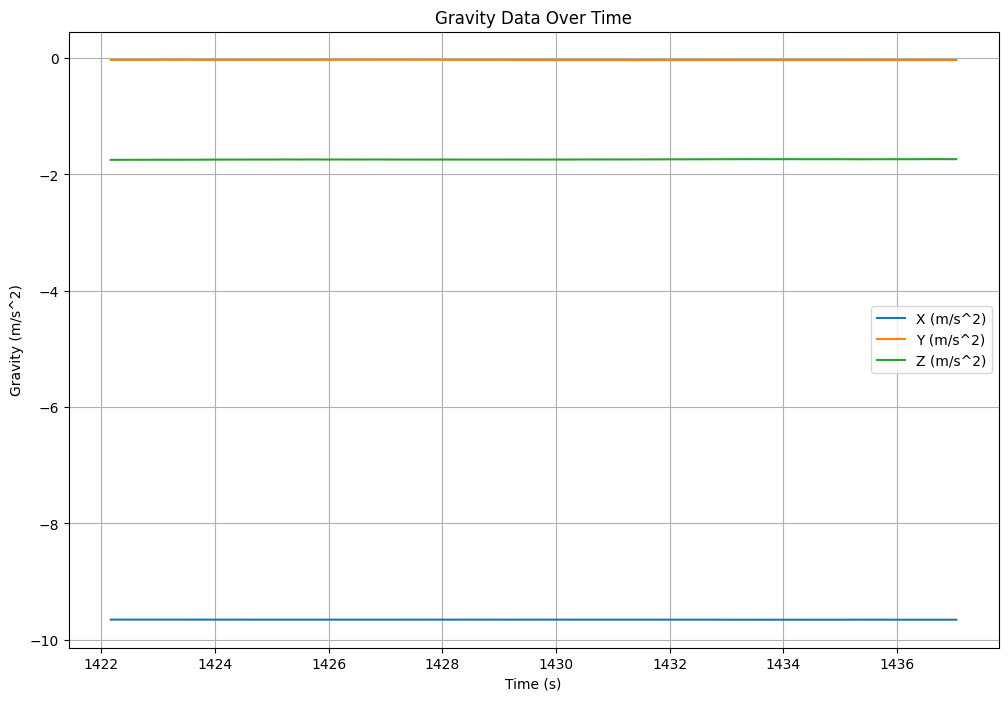

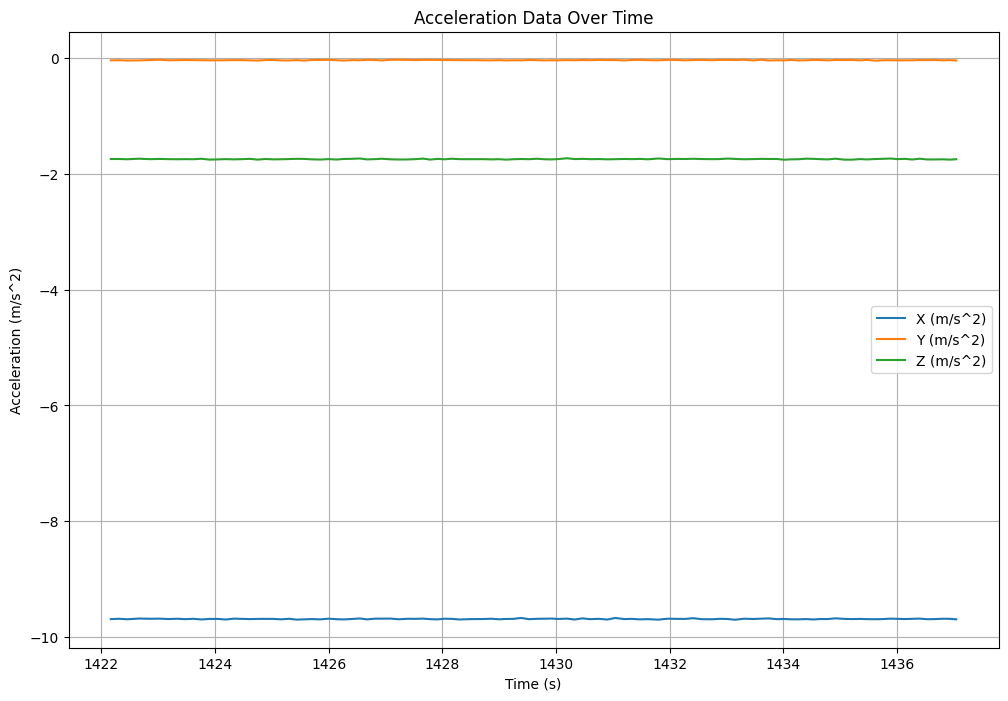

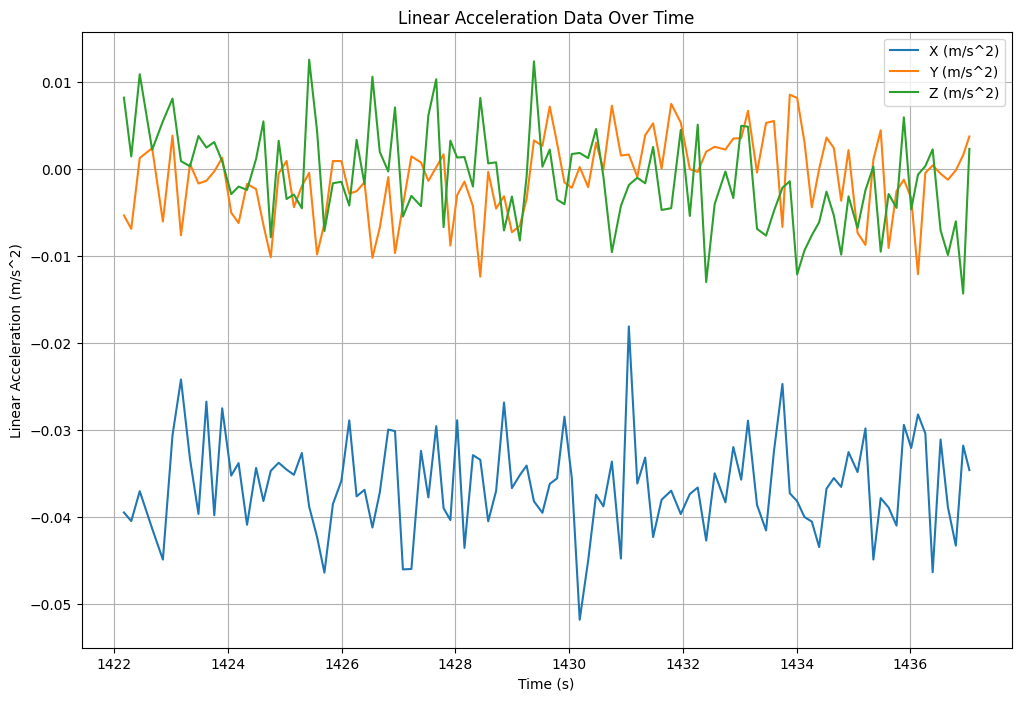

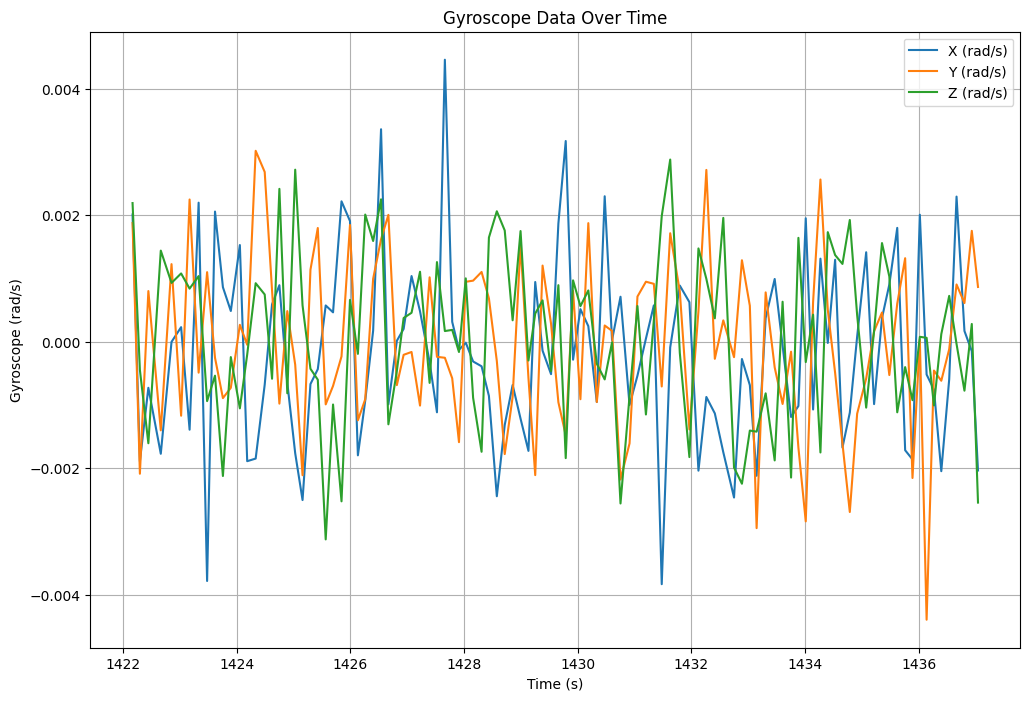

In [33]:
plot_all_sensors(static_primo_L)

## Static Primo Right
*Skate with the right side touching the ground*

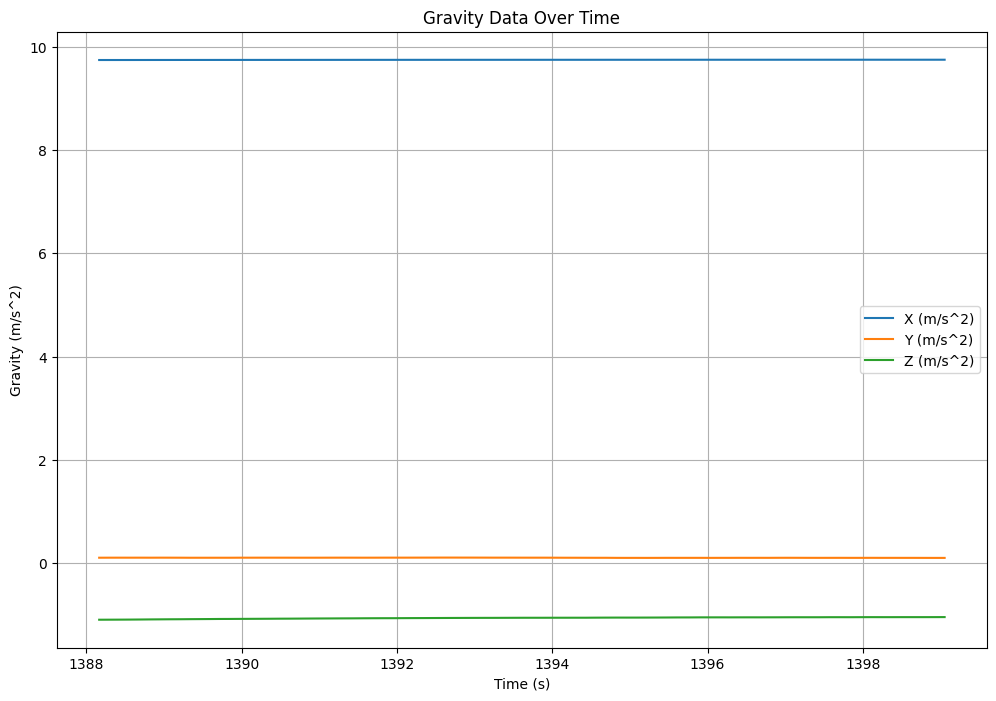

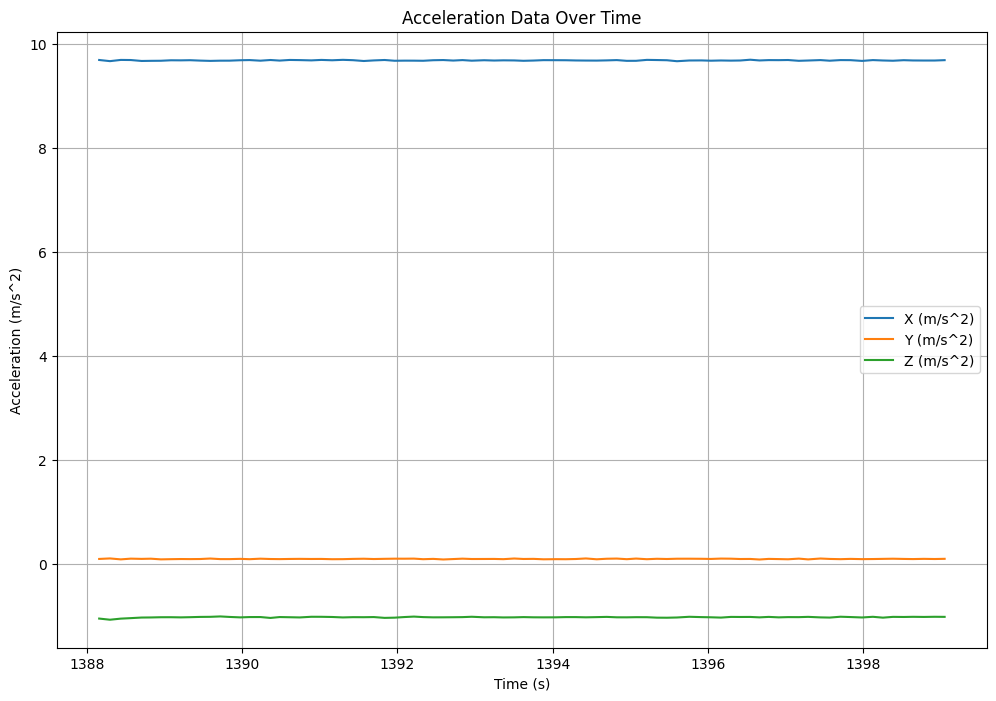

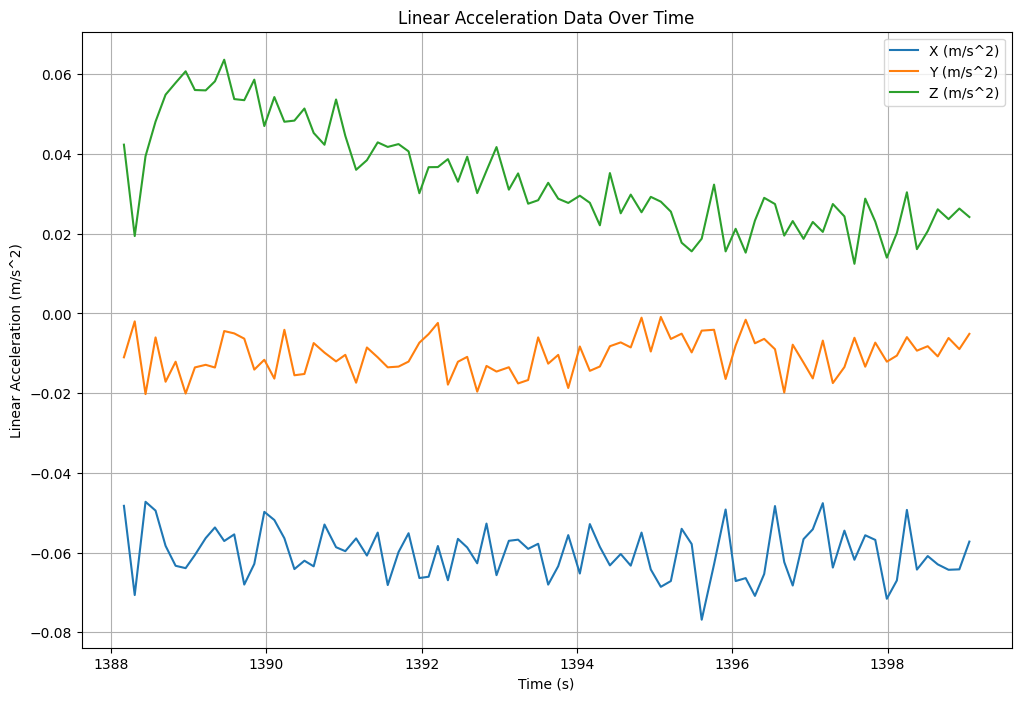

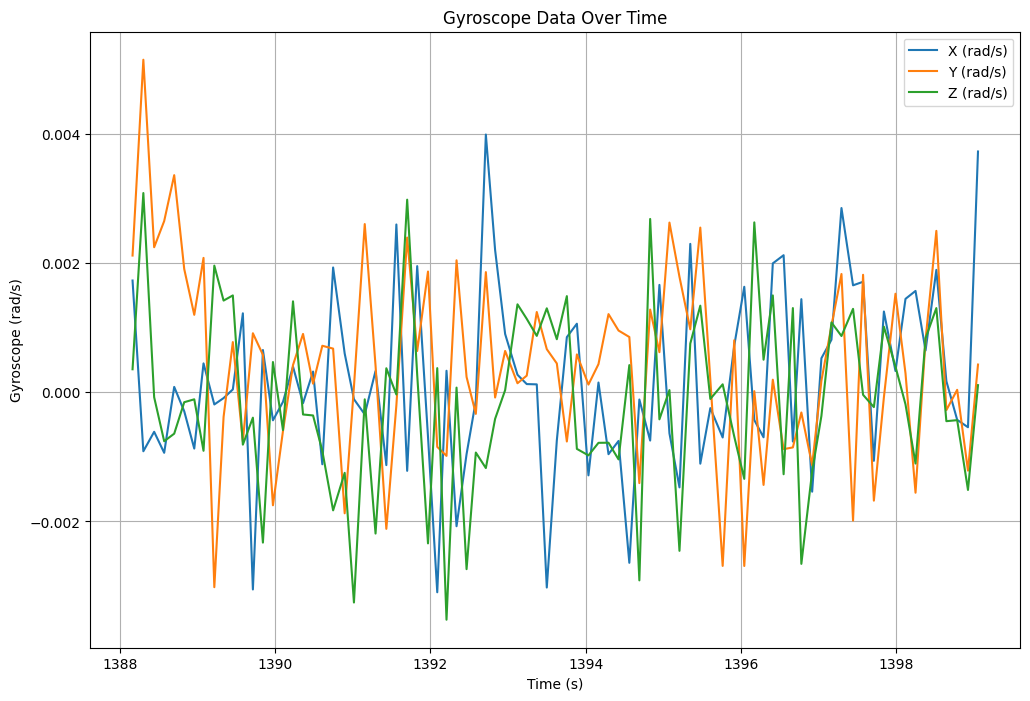

In [34]:
plot_all_sensors(static_primo_R)

In [35]:
static_primo_L_statistics = clean_statistics(static_primo_L)
display(static_primo_L_statistics)

,gravity_x,gravity_y,gravity_z,lin_acc_x,lin_acc_y,lin_acc_z,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,-9.653887,-0.032149,-1.742847,-0.036342,-0.001063,-0.001028,-9.689256,-0.033659,-1.743609,-0.000158,-0.000029,0.000076
std,0.000577,0.001583,0.003215,0.005482,0.004595,0.005492,0.005819,0.003768,0.005099,0.001462,0.001347,0.001313
min,-9.654837,-0.034395,-1.750076,-0.051780,-0.012394,-0.014341,-9.702224,-0.042212,-1.753903,-0.003837,-0.004399,-0.003128
25%,-9.654525,-0.033524,-1.744743,-0.039646,-0.003957,-0.004543,-9.693018,-0.036524,-1.746793,-0.001095,-0.000911,-0.000839
50%,-9.653696,-0.032838,-1.743952,-0.036745,-0.000478,-0.001504,-9.689052,-0.033381,-1.744173,-0.000152,-0.000159,0.000168
75%,-9.653543,-0.030841,-1.739297,-0.033025,0.002045,0.002244,-9.685609,-0.030536,-1.740131,0.000608,0.000910,0.000997
max,-9.652581,-0.028800,-1.737558,-0.018111,0.008492,0.012507,-9.671538,-0.026196,-1.728755,0.004459,0.003019,0.002880


In [36]:
static_primo_R_statistics = clean_statistics(static_primo_R)
display(static_primo_R_statistics)

,gravity_x,gravity_y,gravity_z,lin_acc_x,lin_acc_y,lin_acc_z,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,9.751053,0.099065,-1.069132,-0.060041,-0.010529,0.033928,9.691006,0.088573,-1.034438,0.000170,0.000417,-0.000126
std,0.001639,0.001767,0.014772,0.006281,0.004832,0.013007,0.006283,0.004703,0.008911,0.001405,0.001459,0.001376
min,9.747366,0.095995,-1.102285,-0.076863,-0.020245,0.012439,9.675430,0.077838,-1.082100,-0.003097,-0.003018,-0.003522
25%,9.749926,0.097259,-1.079383,-0.064260,-0.013536,0.024049,9.686170,0.085173,-1.036894,-0.000747,-0.000348,-0.000907
50%,9.751532,0.099290,-1.064709,-0.060129,-0.010499,0.030167,9.690623,0.088541,-1.033376,0.000062,0.000431,-0.000110
75%,9.752481,0.100476,-1.056289,-0.055664,-0.006722,0.042374,9.696162,0.092545,-1.029073,0.001100,0.001217,0.000844
max,9.753045,0.102256,-1.051195,-0.047271,-0.000887,0.063653,9.704170,0.098345,-1.018781,0.003988,0.005146,0.003083
